In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

import rbm_qst
import rbm_classic

import utils
import paper_functions

# Research

## RBM QST

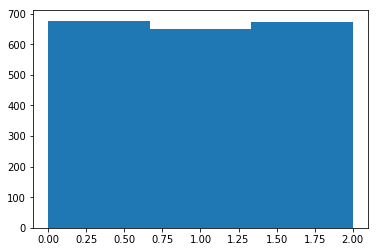

In [25]:
num_units = 3
num_samples = 2000

dataset = utils.dataset_w(num_units, num_samples, hist=True)


# # Replace `r_qst.weights_lambda` with `r_cl.weights`.
# #
# r_cl = rbm_classic.RBM(num_units, 5)  # RBM from rbm_classic.py
# r_cl.train(dataset, max_epochs=150, learning_rate=0.5)
# r_qst.weights_lambda = r_cl.weights


In [20]:
occurs, data_hist = utils.dataset_to_hist(dataset)      
print(occurs)

[   0 1604 1619    0 1579    0    0    0 1609    0    0    0    0    0    0
    0 1589]


In [21]:
tmp = data_hist[occurs!=0]
print(tmp)

[[0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


In [34]:
r_qst = rbm_qst.RBM_QST(num_units, 5)

In [35]:
r_qst.train(dataset, dataset, max_epochs=3000, learning_rate=0.2, debug=True, precise=True)

Epoch 0: objective is 2.07983906088
Epoch 100: objective is 1.91324624462
Epoch 200: objective is 1.90990641023
Epoch 300: objective is 1.90565933873
Epoch 400: objective is 1.8969332297
Epoch 500: objective is 1.87586077309
Epoch 600: objective is 1.82981379013
Epoch 700: objective is 1.74898591954
Epoch 800: objective is 1.62187307545
Epoch 900: objective is 1.48160437908
Epoch 1000: objective is 1.38245597102
Epoch 1100: objective is 1.32027848881
Epoch 1200: objective is 1.27951662239
Epoch 1300: objective is 1.25114648811
Epoch 1400: objective is 1.23039280792
Epoch 1500: objective is 1.21460072541
Epoch 1600: objective is 1.20220236246
Epoch 1700: objective is 1.1922202007
Epoch 1800: objective is 1.18401600433
Epoch 1900: objective is 1.17715653565
Epoch 2000: objective is 1.17133788855
Epoch 2100: objective is 1.16634083508
Epoch 2200: objective is 1.16200338851
Epoch 2300: objective is 1.15820334164
Epoch 2400: objective is 1.15484680686
Epoch 2500: objective is 1.15186048956


KeyboardInterrupt: 

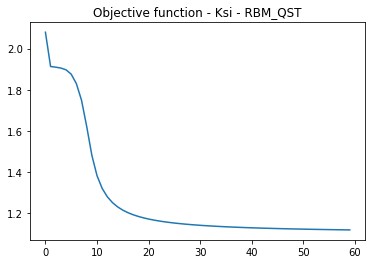

In [32]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [33]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_qst, utils.into_dict(dataset), num_samples=2000)
fid

0.97945983646055945

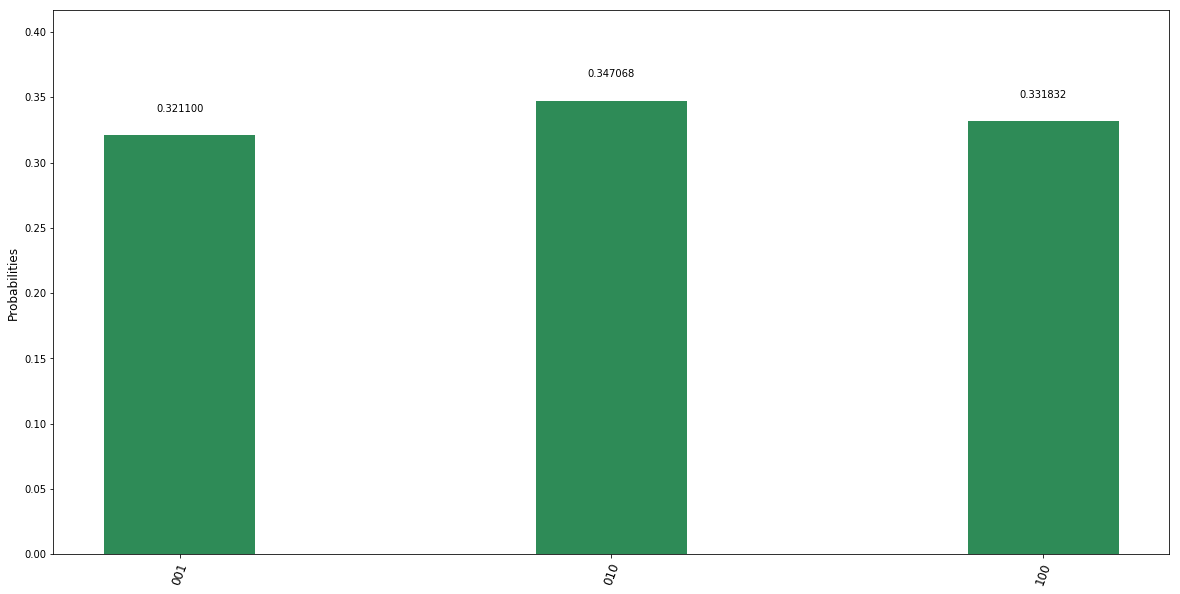

In [39]:
utils.plot_histogram(states)

## Classical RBM

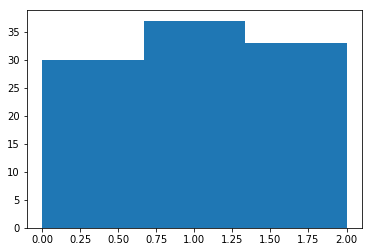

In [7]:
num_units = 3

r_cl = rbm_classic.RBM(num_units, 2)
dataset = utils.dataset_w(num_units, 100, hist=True)

In [8]:
r_cl.train(dataset, max_epochs=500, learning_rate=0.5)

Epoch 0: objective is 2.07874865371
Epoch 50: objective is 1.9378942441
Epoch 100: objective is 1.78736081265
Epoch 150: objective is 1.61995444424
Epoch 200: objective is 1.47809677013
Epoch 250: objective is 1.40397930104
Epoch 300: objective is 1.37119340117
Epoch 350: objective is 1.34428404783
Epoch 400: objective is 1.32610144543
Epoch 450: objective is 1.30742741974


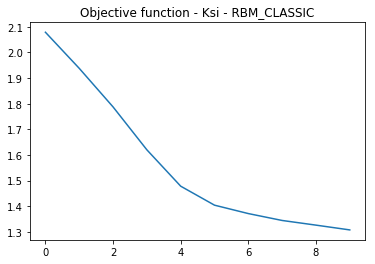

In [9]:
plt.plot(r_cl.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [10]:
# Fidelity.
fid, states = utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))
fid

0.89902991649765218

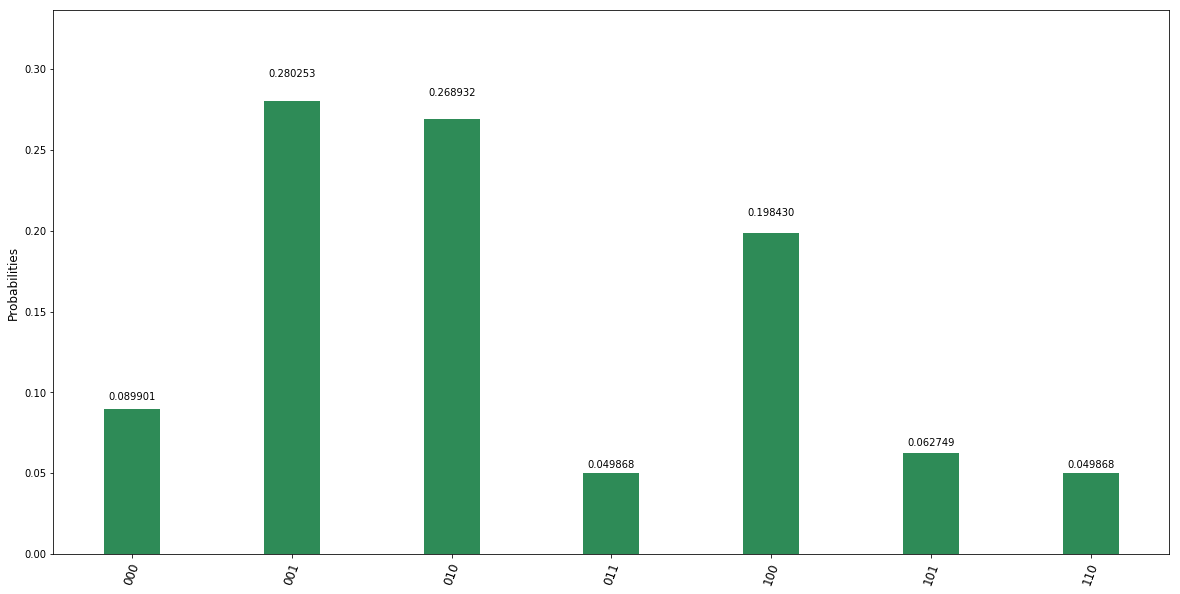

In [11]:
utils.plot_histogram(states)

# Plot Fig.1 b

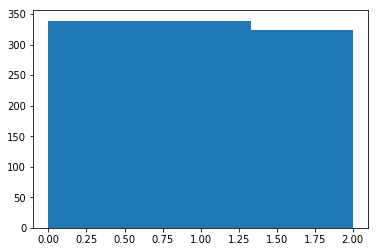

In [14]:
dataset = utils.dataset_w(num_units, 1000, hist=True)

In [19]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_cl = rbm_classic.RBM(num_units, num_units, debug_print=False)
    r_cl.train(dataset, max_epochs=10000, learning_rate=0.3)

    fidelities.append(utils.fidelity_RBM(r_cl, utils.into_dict(utils.ideal_w(num_units)))[0])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

100%|██████████| 4/4 [00:08<00:00,  2.27s/it]


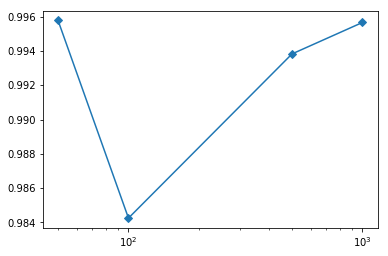

In [20]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()

In [257]:
import tqdm

num_units = 3
fidelities = []
N_samples = [50, 100, 500, 1000]

for N_s in tqdm.tqdm(N_samples):
    dataset = utils.dataset_w(num_units, N_s)
    
    r_qst = rbm_qst.RBM_QST(num_units, num_units)
    r_qst.train(dataset, dataset, max_epochs=500, learning_rate=0.9)

    fidelities.append(utils.fidelity_RBM(r_qst, utils.into_dict(utils.ideal_w(num_units)))[0])
    print(fidelities[-1])

overlaps = list(map(lambda x: np.sqrt(x), fidelities))

 25%|██▌       | 1/4 [00:02<00:06,  2.13s/it]

0.900757985478


 50%|█████     | 2/4 [00:05<00:05,  2.51s/it]

0.899375844188


 75%|███████▌  | 3/4 [00:20<00:06,  6.17s/it]

0.813115629923


100%|██████████| 4/4 [00:48<00:00, 12.69s/it]

0.906301373461


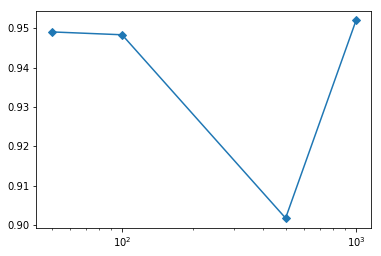

In [258]:
plt.semilogx(N_samples, overlaps, '.-', marker='D')
plt.show()